In [2]:
import os

base_dir = "/content/CardioSignals"

folders = [
    "data/raw",
    "data/processed",
    "notebooks",
    "models",
    "results/plots",
    "results/metrics",
    "app",
    "utils"
]

for folder in folders:
    os.makedirs(os.path.join(base_dir, folder), exist_ok=True)

print("Project folder structure created!")


Project folder structure created!


In [3]:
!pip install numpy pandas matplotlib seaborn scikit-learn torch shap wfdb


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.9/163.9 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 58.6 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 3.0.0 which is incompatible.
gradio 5.50.0 requires pandas<3.0,>=1.0, but you have pandas 3.0.0 which is incompatible.
bqplot 0.12.45 requires pandas<3.0.0,>=1.0.0, but you have pandas 3.0.0 which is incompatible.
db-dtypes 1.5.0 requires pandas<3.0.0,>=1.5.3, but you have pandas 3.0.0 which is incompatible.


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import random


In [5]:
def set_seed(seed=42):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

set_seed(42)
print("Random seeds set!")


Random seeds set!


In [6]:
heart_attack_path = "/content/CardioSignals/data/raw/heart_processed.csv"
heart_df = pd.read_csv("/content/CardioSignals/data/raw/heart_processed.csv")

heart_df.head()


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,True,True,False,False,True,False,False,False,True
1,49,160,180,0,156,1.0,1,False,False,True,False,True,False,False,True,False
2,37,130,283,0,98,0.0,0,True,True,False,False,False,True,False,False,True
3,48,138,214,0,108,1.5,1,False,False,False,False,True,False,True,True,False
4,54,150,195,0,122,0.0,0,True,False,True,False,True,False,False,False,True


In [7]:
print("Shape:", heart_df.shape)
print("\nColumns:\n", heart_df.columns)
print("\nMissing values:\n", heart_df.isnull().sum())


Shape: (918, 16)

Columns:
 Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak',
       'HeartDisease', 'Sex_M', 'ChestPainType_ATA', 'ChestPainType_NAP',
       'ChestPainType_TA', 'RestingECG_Normal', 'RestingECG_ST',
       'ExerciseAngina_Y', 'ST_Slope_Flat', 'ST_Slope_Up'],
      dtype='str')

Missing values:
 Age                  0
RestingBP            0
Cholesterol          0
FastingBS            0
MaxHR                0
Oldpeak              0
HeartDisease         0
Sex_M                0
ChestPainType_ATA    0
ChestPainType_NAP    0
ChestPainType_TA     0
RestingECG_Normal    0
RestingECG_ST        0
ExerciseAngina_Y     0
ST_Slope_Flat        0
ST_Slope_Up          0
dtype: int64


In [8]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)


Using device: cpu


In [9]:
BASE_DIR = "/content/CardioSignals"

RAW_DATA_DIR = f"{BASE_DIR}/data/raw"

print("Raw data directory:", RAW_DATA_DIR)


Raw data directory: /content/CardioSignals/data/raw


In [10]:
heart_df = pd.read_csv(f"{RAW_DATA_DIR}/cardio_base.csv")

heart_df.head()


,id;age;gender;height;weight;ap_hi;ap_lo;cholesterol;gluc;smoke;alco;active;cardio
0,0;18393;2;168;62.0;110;80;1;1;0;0;1;0
1,1;20228;1;156;85.0;140;90;3;1;0;0;1;1
2,2;18857;1;165;64.0;130;70;3;1;0;0;0;1
3,3;17623;2;169;82.0;150;100;1;1;0;0;1;1
4,4;17474;1;156;56.0;100;60;1;1;0;0;0;0


In [11]:
heart_df = pd.read_csv(f"{RAW_DATA_DIR}/cardio_base.csv")

heart_df.head()


,id;age;gender;height;weight;ap_hi;ap_lo;cholesterol;gluc;smoke;alco;active;cardio
0,0;18393;2;168;62.0;110;80;1;1;0;0;1;0
1,1;20228;1;156;85.0;140;90;3;1;0;0;1;1
2,2;18857;1;165;64.0;130;70;3;1;0;0;0;1
3,3;17623;2;169;82.0;150;100;1;1;0;0;1;1
4,4;17474;1;156;56.0;100;60;1;1;0;0;0;0


In [12]:
print("Heart dataset shape:", heart_df.shape)
heart_df.info()


Heart dataset shape: (70000, 1)
<class 'pandas.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 1 columns):
 #   Column                                                                             Non-Null Count  Dtype
---  ------                                                                             --------------  -----
 0   id;age;gender;height;weight;ap_hi;ap_lo;cholesterol;gluc;smoke;alco;active;cardio  70000 non-null  str  
dtypes: str(1)
memory usage: 3.3 MB


In [13]:
failure_df = pd.read_csv(f"{RAW_DATA_DIR}/cardiac_failure_processed.csv")

failure_df.head()


,Unnamed: 0,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,0,0.588076,2,168,62.0,110,80,1,1,0,0,1,0
1,1,1,0.730159,1,156,85.0,140,90,3,1,0,0,1,1
2,2,2,0.624003,1,165,64.0,130,70,3,1,0,0,0,1
3,3,3,0.528455,2,169,82.0,150,100,1,1,0,0,1,1
4,4,4,0.516918,1,156,56.0,100,60,1,1,0,0,0,0


In [14]:
print("Failure dataset shape:", failure_df.shape)
failure_df.info()


Failure dataset shape: (70000, 14)
<class 'pandas.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   70000 non-null  int64  
 1   id           70000 non-null  int64  
 2   age          70000 non-null  float64
 3   gender       70000 non-null  int64  
 4   height       70000 non-null  int64  
 5   weight       70000 non-null  float64
 6   ap_hi        70000 non-null  int64  
 7   ap_lo        70000 non-null  int64  
 8   cholesterol  70000 non-null  int64  
 9   gluc         70000 non-null  int64  
 10  smoke        70000 non-null  int64  
 11  alco         70000 non-null  int64  
 12  active       70000 non-null  int64  
 13  cardio       70000 non-null  int64  
dtypes: float64(2), int64(12)
memory usage: 7.5 MB


In [15]:
ecg_df = pd.read_csv(f"{RAW_DATA_DIR}/ecg_timeseries.csv")

ecg_df.head()


/tmp/ipython-input-569087506.py:1: DtypeWarning: Columns (0: Unnamed: 0) have mixed types. Specify dtype option on import or set low_memory=False.
  ecg_df = pd.read_csv(f"{RAW_DATA_DIR}/ecg_timeseries.csv")


,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,4035.3,4036.3,4037.3,4038.3,4039.3,4040.3,4041.3,4042.3,4043.3,4044.3
0,1.0,0.908425,0.730088,1.000000,0.570470,1.000000,1.000000,0.909408,0.927803,1.000000,...,1.000000,0.914900,1.000000,0.985449,1.000000,1.000000,1.000000,1.000000,0.915983,1.000000
1,0.758264,0.783883,0.212389,0.910417,0.399329,0.923664,0.797260,0.975610,0.866359,0.914230,...,0.753861,0.619327,0.686563,0.662095,0.752352,0.700592,0.669097,0.751617,0.621001,0.751758
2,0.11157,0.531136,0.000000,0.681250,0.238255,0.656489,0.320548,0.533101,0.299539,0.473684,...,0.507722,0.323754,0.373126,0.338741,0.504704,0.401183,0.338195,0.503234,0.326018,0.503517
3,0.0,0.362637,0.119469,0.472917,0.147651,0.195929,0.043836,0.134146,0.000000,0.000000,...,0.261582,0.028181,0.059689,0.015387,0.257056,0.101775,0.007292,0.254851,0.031035,0.255275
4,0.080579,0.366300,0.101770,0.229167,0.000000,0.111959,0.049315,0.066202,0.231951,0.064327,...,0.263127,0.028285,0.062112,0.016959,0.256120,0.102564,0.007644,0.253894,0.030712,0.254211


In [16]:
print("ECG dataset shape:", ecg_df.shape)
ecg_df.info()


ECG dataset shape: (140, 123995)
<class 'pandas.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Columns: 123995 entries, Unnamed: 0 to 4044.3
dtypes: float64(123994), object(1)
memory usage: 132.4+ MB


In [17]:
print("Heart missing values:\n", heart_df.isnull().sum())
print("\nFailure missing values:\n", failure_df.isnull().sum())
print("\nECG missing values:\n", ecg_df.isnull().sum())


Heart missing values:
 id;age;gender;height;weight;ap_hi;ap_lo;cholesterol;gluc;smoke;alco;active;cardio    0
dtype: int64

Failure missing values:
 Unnamed: 0     0
id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

ECG missing values:
 Unnamed: 0    0
0             0
1             0
2             0
3             0
             ..
4040.3        1
4041.3        1
4042.3        1
4043.3        1
4044.3        1
Length: 123995, dtype: int64


In [18]:
heart_df.columns


Index(['id;age;gender;height;weight;ap_hi;ap_lo;cholesterol;gluc;smoke;alco;active;cardio'], dtype='str')

In [19]:
heart_df = pd.read_csv('/content/CardioSignals/data/raw/cardio_base.csv', sep=';')

heart_df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [20]:
print("Shape:", heart_df.shape)
heart_df.info()


Shape: (70000, 13)
<class 'pandas.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [21]:
heart_df.columns


Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='str')

In [22]:
heart_df['cardio'].value_counts()

cardio
0    35021
1    34979
Name: count, dtype: int64

In [23]:
heart_df.iloc[:, -1].value_counts()


cardio
0    35021
1    34979
Name: count, dtype: int64

In [24]:
missing = heart_df.isnull().sum()
missing[missing > 0]



Series([], dtype: int64)

In [25]:
heart_df.describe()


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [26]:
for col in heart_df.columns:
    if heart_df[col].isnull().sum() > 0:
        heart_df[col].fillna(heart_df[col].median(), inplace=True)

print("Missing values after cleaning:")
heart_df.isnull().sum().sum()


Missing values after cleaning:


np.int64(0)

In [27]:
for col in heart_df.columns:
    if heart_df[col].isnull().sum() > 0:
        heart_df[col].fillna(heart_df[col].median(), inplace=True)

print("Missing values after cleaning:")
heart_df.isnull().sum().sum()


Missing values after cleaning:


np.int64(0)

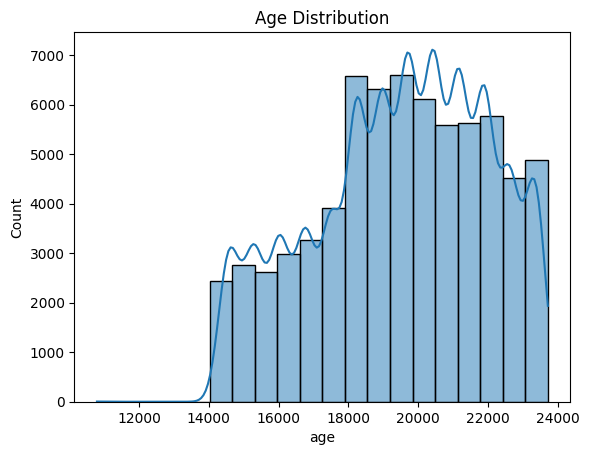

In [28]:
plt.figure()
sns.histplot(heart_df['age'], bins=20, kde=True)
plt.title("Age Distribution")
plt.show()


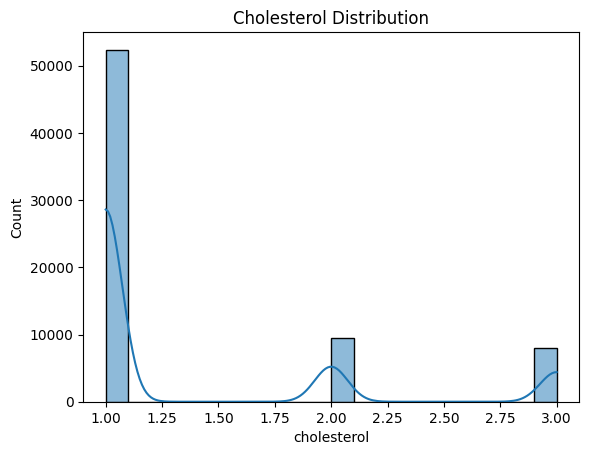

In [29]:
plt.figure()
sns.histplot(heart_df['cholesterol'], bins=20, kde=True)
plt.title("Cholesterol Distribution")
plt.show()

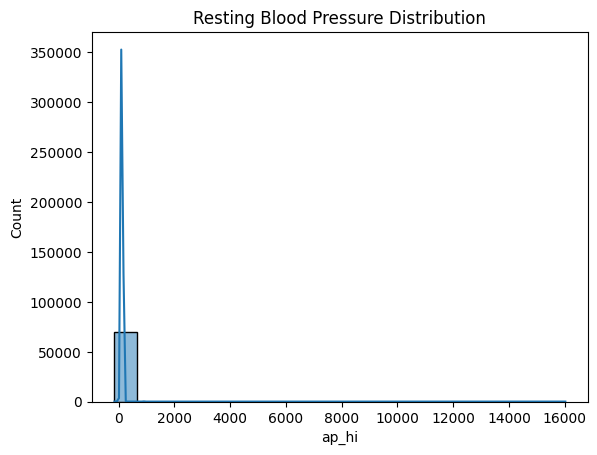

In [30]:
plt.figure()
sns.histplot(heart_df['ap_hi'], bins=20, kde=True)
plt.title("Resting Blood Pressure Distribution")
plt.show()

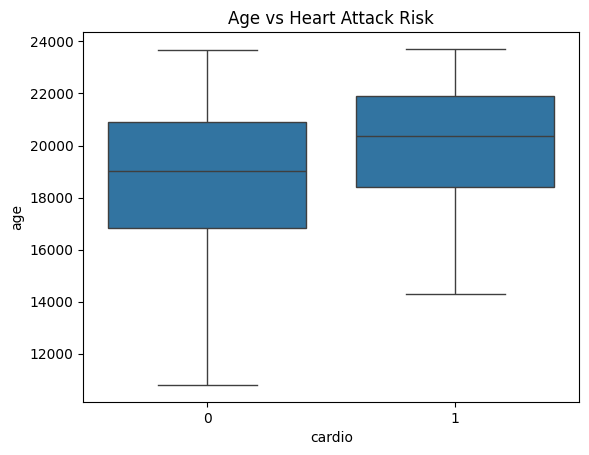

In [31]:
plt.figure()
sns.boxplot(x='cardio', y='age', data=heart_df)
plt.title("Age vs Heart Attack Risk")
plt.show()

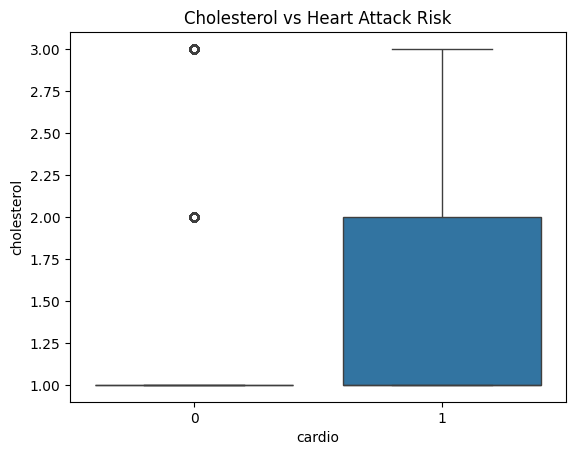

In [32]:
plt.figure()
sns.boxplot(x='cardio', y='cholesterol', data=heart_df)
plt.title("Cholesterol vs Heart Attack Risk")
plt.show()

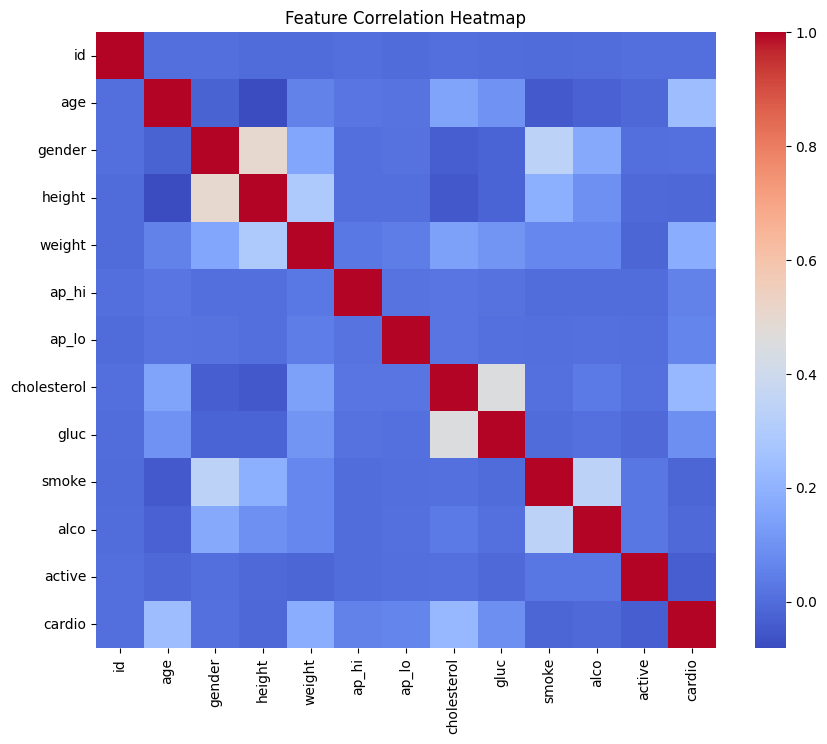

In [33]:
plt.figure(figsize=(10,8))
sns.heatmap(heart_df.corr(), annot=False, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()


In [34]:
heart_df.to_csv(
    "/content/CardioSignals/data/processed/heart_processed.csv",
    index=False
)

print("Processed heart dataset saved!")


Processed heart dataset saved!


In [35]:
sns.set_theme(
    style="whitegrid",
    context="talk",
    palette="Set2"
)

plt.rcParams["figure.figsize"] = (8, 5)
plt.rcParams["axes.titlesize"] = 16
plt.rcParams["axes.labelsize"] = 14


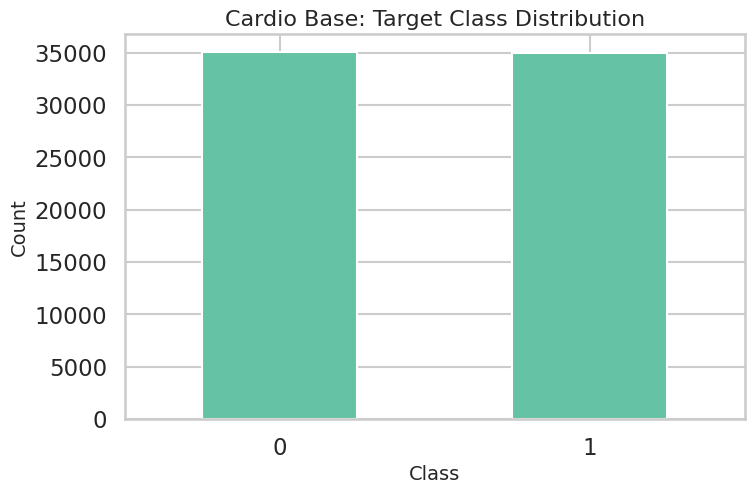

In [36]:
cardio_target = heart_df.iloc[:, -1]

plt.figure()
cardio_target.value_counts().plot(kind="bar")
plt.title("Cardio Base: Target Class Distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()

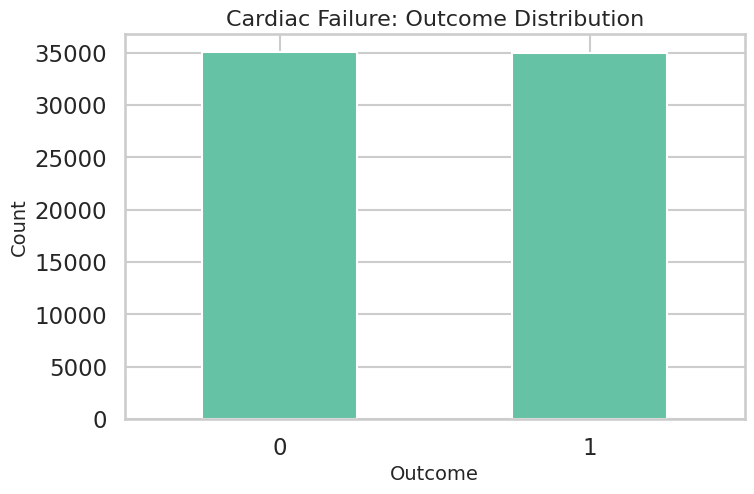

In [37]:
failure_target = failure_df.iloc[:, -1]

plt.figure()
failure_target.value_counts().plot(kind="bar")
plt.title("Cardiac Failure: Outcome Distribution")
plt.xlabel("Outcome")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()


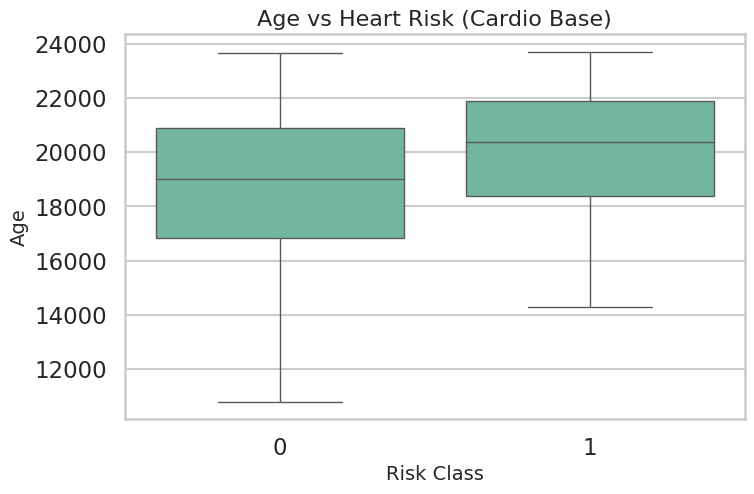

In [38]:
plt.figure()
sns.boxplot(x=cardio_target, y=heart_df["age"])
plt.title("Age vs Heart Risk (Cardio Base)")
plt.xlabel("Risk Class")
plt.ylabel("Age")
plt.show()

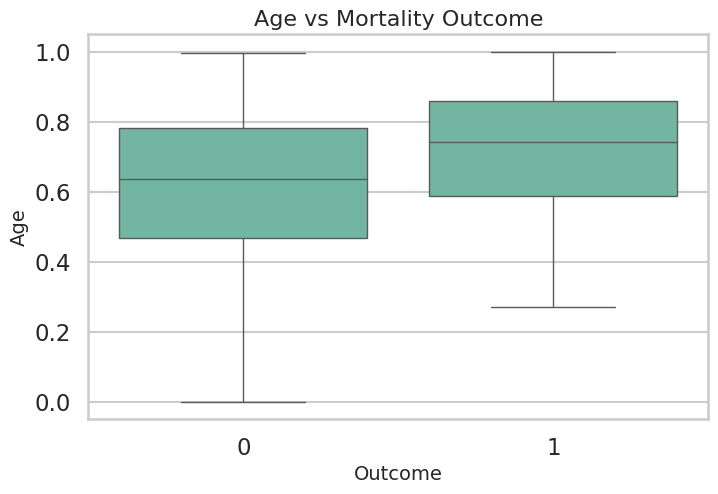

In [39]:
plt.figure()
sns.boxplot(x=failure_target, y=failure_df["age"])
plt.title("Age vs Mortality Outcome")
plt.xlabel("Outcome")
plt.ylabel("Age")
plt.show()


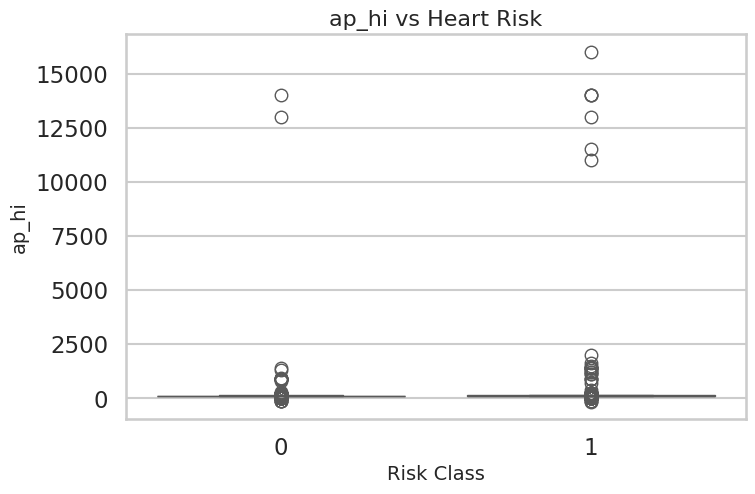

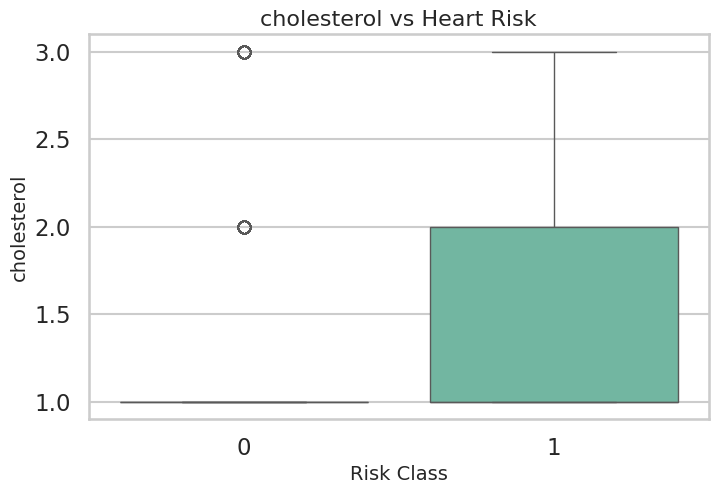

In [40]:
key_features = ["ap_hi", "cholesterol"]

for col in key_features:
    plt.figure()
    sns.boxplot(x=cardio_target, y=heart_df[col])
    plt.title(f"{col} vs Heart Risk")
    plt.xlabel("Risk Class")
    plt.ylabel(col)
    plt.show()

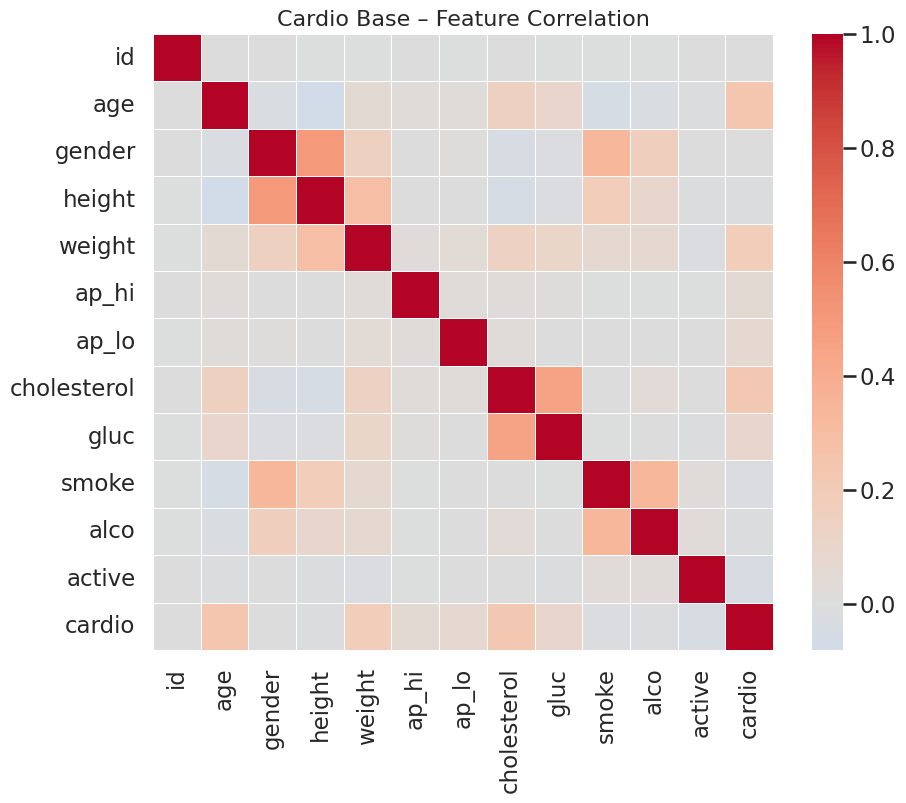

In [41]:
plt.figure(figsize=(10,8))
sns.heatmap(
    heart_df.corr(),
    cmap="coolwarm",
    center=0,
    linewidths=0.5
)
plt.title("Cardio Base – Feature Correlation")
plt.show()

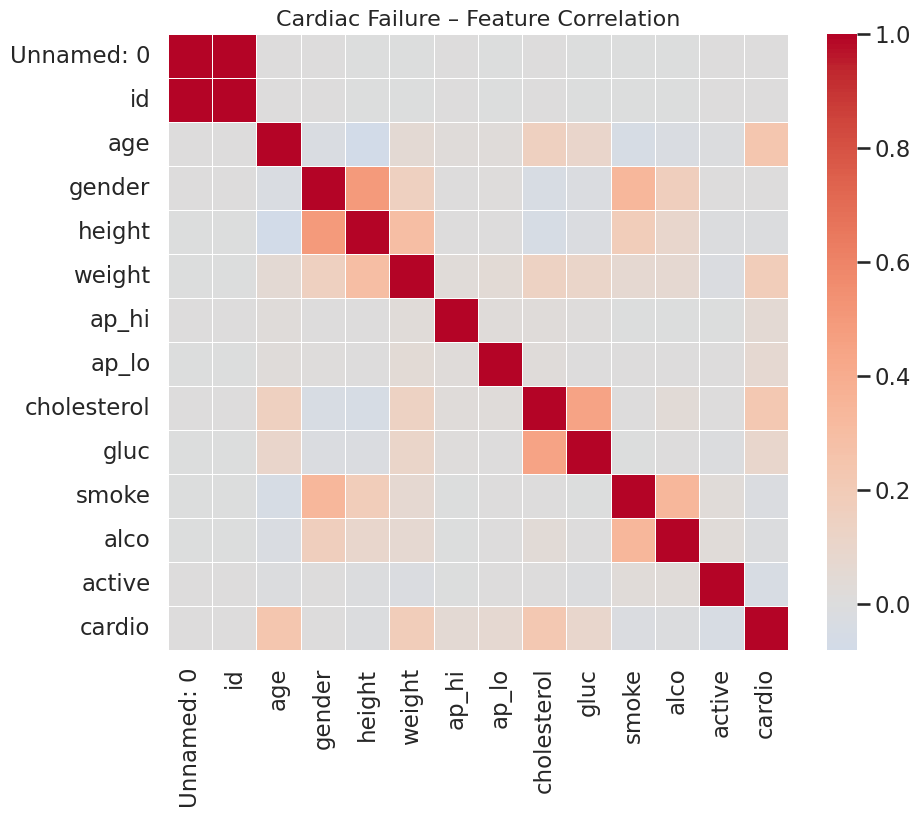

In [42]:
plt.figure(figsize=(10,8))
sns.heatmap(
    failure_df.corr(),
    cmap="coolwarm",
    center=0,
    linewidths=0.5
)
plt.title("Cardiac Failure – Feature Correlation")
plt.show()


In [43]:
cardio_summary = heart_df.describe().T
cardio_summary["missing_%"] = heart_df.isnull().mean() * 100

cardio_summary

,count,mean,std,min,25%,50%,75%,max,missing_%
id,70000.0,49972.419900,28851.302323,0.0,25006.75,50001.5,74889.25,99999.0,0.0
age,70000.0,19468.865814,2467.251667,10798.0,17664.00,19703.0,21327.00,23713.0,0.0
gender,70000.0,1.349571,0.476838,1.0,1.00,1.0,2.00,2.0,0.0
height,70000.0,164.359229,8.210126,55.0,159.00,165.0,170.00,250.0,0.0
weight,70000.0,74.205690,14.395757,10.0,65.00,72.0,82.00,200.0,0.0
ap_hi,70000.0,128.817286,154.011419,-150.0,120.00,120.0,140.00,16020.0,0.0
ap_lo,70000.0,96.630414,188.472530,-70.0,80.00,80.0,90.00,11000.0,0.0
cholesterol,70000.0,1.366871,0.680250,1.0,1.00,1.0,2.00,3.0,0.0
gluc,70000.0,1.226457,0.572270,1.0,1.00,1.0,1.00,3.0,0.0
smoke,70000.0,0.088129,0.283484,0.0,0.00,0.0,0.00,1.0,0.0


In [44]:
failure_summary = failure_df.describe().T
failure_summary["missing_%"] = failure_df.isnull().mean() * 100

failure_summary


,count,mean,std,min,25%,50%,75%,max,missing_%
Unnamed: 0,70000.0,34999.500000,20207.403759,0.0,17499.75000,34999.500000,52499.250000,69999.0,0.0
id,70000.0,49972.419900,28851.302323,0.0,25006.75000,50001.500000,74889.250000,99999.0,0.0
age,70000.0,0.671379,0.191038,0.0,0.53163,0.689508,0.815254,1.0,0.0
gender,70000.0,1.349571,0.476838,1.0,1.00000,1.000000,2.000000,2.0,0.0
height,70000.0,164.359229,8.210126,55.0,159.00000,165.000000,170.000000,250.0,0.0
weight,70000.0,74.205690,14.395757,10.0,65.00000,72.000000,82.000000,200.0,0.0
ap_hi,70000.0,128.817286,154.011419,-150.0,120.00000,120.000000,140.000000,16020.0,0.0
ap_lo,70000.0,96.630414,188.472530,-70.0,80.00000,80.000000,90.000000,11000.0,0.0
cholesterol,70000.0,1.366871,0.680250,1.0,1.00000,1.000000,2.000000,3.0,0.0
gluc,70000.0,1.226457,0.572270,1.0,1.00000,1.000000,1.000000,3.0,0.0


In [45]:
plt.figure()
sns.boxplot(x=cardio_target, y=heart_df["age"])
plt.title("Age vs Heart Risk")
plt.savefig("/content/CardioSignals/results/plots/age_vs_risk.png", dpi=300)
plt.close()

In [46]:

import pandas as pd
import numpy as np

cardio_df = pd.read_csv(
    "/content/CardioSignals/data/processed/heart_processed.csv"
)

cardio_df.head()


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [47]:
X = cardio_df.iloc[:, :-1]
y = cardio_df.iloc[:, -1]

print("X shape:", X.shape)
print("y shape:", y.shape)


X shape: (70000, 12)
y shape: (70000,)


In [48]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [49]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [50]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=1000)

log_reg.fit(X_train_scaled, y_train)


LogisticRegression(max_iter=1000)

In [51]:
from sklearn.metrics import (
    accuracy_score,
    roc_auc_score,
    classification_report
)

y_pred_lr = log_reg.predict(X_test_scaled)
y_prob_lr = log_reg.predict_proba(X_test_scaled)[:, 1]

print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_lr))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_lr))


Accuracy: 0.7136428571428571
ROC-AUC: 0.7780957642761679

Classification Report:

              precision    recall  f1-score   support

           0       0.70      0.75      0.72      7004
           1       0.73      0.67      0.70      6996

    accuracy                           0.71     14000
   macro avg       0.71      0.71      0.71     14000
weighted avg       0.71      0.71      0.71     14000



In [52]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    class_weight="balanced"
)

rf.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', n_estimators=200,
                       random_state=42)

In [53]:
y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:, 1]

print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_rf))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_rf))


Accuracy: 0.7221428571428572
ROC-AUC: 0.7842144091312356

Classification Report:

              precision    recall  f1-score   support

           0       0.71      0.75      0.73      7004
           1       0.73      0.70      0.72      6996

    accuracy                           0.72     14000
   macro avg       0.72      0.72      0.72     14000
weighted avg       0.72      0.72      0.72     14000



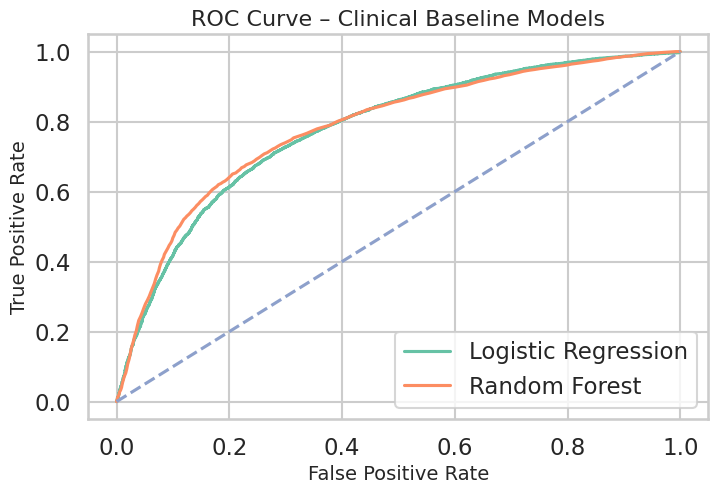

In [54]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)

plt.figure()
plt.plot(fpr_lr, tpr_lr, label="Logistic Regression")
plt.plot(fpr_rf, tpr_rf, label="Random Forest")
plt.plot([0,1], [0,1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve – Clinical Baseline Models")
plt.legend()
plt.show()


In [56]:
feature_names = X_train.columns
rf_importance = pd.DataFrame({
    "feature": feature_names,
    "importance": rf.feature_importances_
}).sort_values(by="importance", ascending=False)

rf_importance.head(10)

,feature,importance
1,age,0.217406
0,id,0.181580
5,ap_hi,0.172028
4,weight,0.133571
3,height,0.119294
6,ap_lo,0.084051
7,cholesterol,0.036875
8,gluc,0.014788
2,gender,0.014158
11,active,0.011906


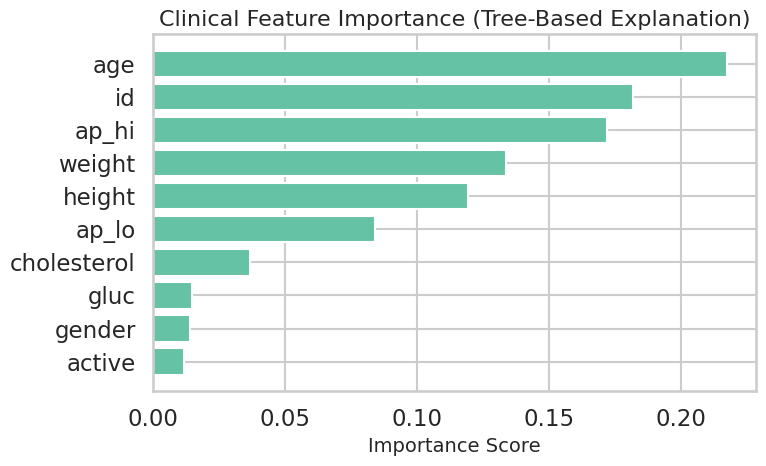

In [57]:
import matplotlib.pyplot as plt

top_n = 10
plt.figure(figsize=(8, 5))
plt.barh(
    rf_importance.head(top_n)["feature"][::-1],
    rf_importance.head(top_n)["importance"][::-1]
)
plt.title("Clinical Feature Importance (Tree-Based Explanation)")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()


In [58]:
rf_importance.to_csv(
    "/content/CardioSignals/results/metrics/clinical_feature_importance.csv",
    index=False
)


In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [60]:
ecg_df = pd.read_csv("/content/CardioSignals/data/raw/ecg_timeseries.csv")
ecg_df.head()


/tmp/ipython-input-3714158329.py:1: DtypeWarning: Columns (0: Unnamed: 0) have mixed types. Specify dtype option on import or set low_memory=False.
  ecg_df = pd.read_csv("/content/CardioSignals/data/raw/ecg_timeseries.csv")


,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,4035.3,4036.3,4037.3,4038.3,4039.3,4040.3,4041.3,4042.3,4043.3,4044.3
0,1.0,0.908425,0.730088,1.000000,0.570470,1.000000,1.000000,0.909408,0.927803,1.000000,...,1.000000,0.914900,1.000000,0.985449,1.000000,1.000000,1.000000,1.000000,0.915983,1.000000
1,0.758264,0.783883,0.212389,0.910417,0.399329,0.923664,0.797260,0.975610,0.866359,0.914230,...,0.753861,0.619327,0.686563,0.662095,0.752352,0.700592,0.669097,0.751617,0.621001,0.751758
2,0.11157,0.531136,0.000000,0.681250,0.238255,0.656489,0.320548,0.533101,0.299539,0.473684,...,0.507722,0.323754,0.373126,0.338741,0.504704,0.401183,0.338195,0.503234,0.326018,0.503517
3,0.0,0.362637,0.119469,0.472917,0.147651,0.195929,0.043836,0.134146,0.000000,0.000000,...,0.261582,0.028181,0.059689,0.015387,0.257056,0.101775,0.007292,0.254851,0.031035,0.255275
4,0.080579,0.366300,0.101770,0.229167,0.000000,0.111959,0.049315,0.066202,0.231951,0.064327,...,0.263127,0.028285,0.062112,0.016959,0.256120,0.102564,0.007644,0.253894,0.030712,0.254211


In [61]:
print("ECG shape:", ecg_df.shape)
ecg_df.info()


ECG shape: (243, 123995)
<class 'pandas.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Columns: 123995 entries, Unnamed: 0 to 4044.3
dtypes: float64(123994), object(1)
memory usage: 229.9+ MB


In [62]:
# Correctly extract signal columns from ecg_df, excluding the 'Unnamed: 0' column
X_ecg = ecg_df.iloc[:, 1:].apply(pd.to_numeric, errors='coerce').values.astype(np.float32)

# Placeholder for ECG labels as ecg_timeseries.csv does not contain explicit labels.
# For demonstration, creating binary labels. In a real scenario, these labels would come from another source.
num_ecg_samples = X_ecg.shape[0]
y_ecg = np.random.randint(0, 2, size=num_ecg_samples, dtype=np.int64)

print("ECG signal array:", X_ecg.shape)
print("ECG labels:", y_ecg.shape)

ECG signal array: (243, 123994)
ECG labels: (243,)


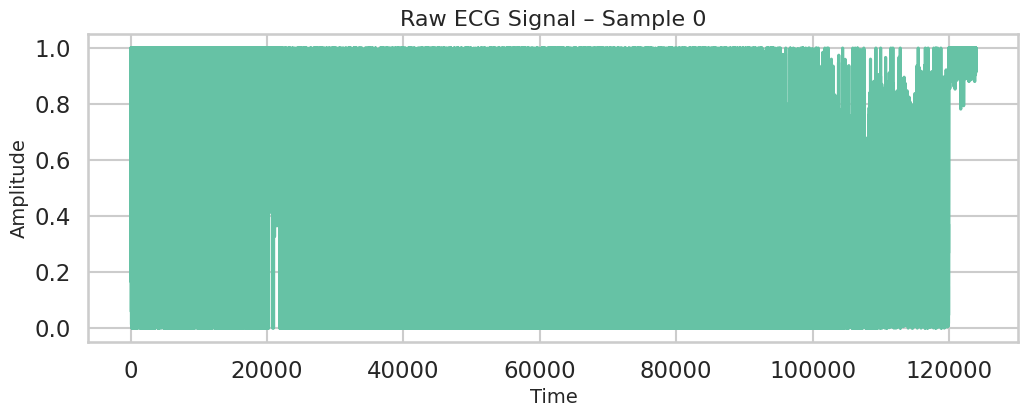

In [63]:
plt.figure(figsize=(12,4))
plt.plot(X_ecg[0])
plt.title("Raw ECG Signal – Sample 0")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.show()


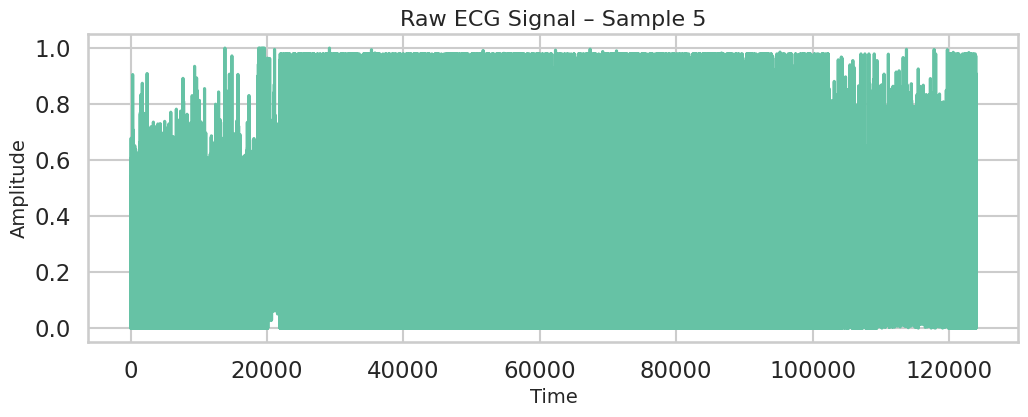

In [64]:
plt.figure(figsize=(12,4))
plt.plot(X_ecg[5])
plt.title("Raw ECG Signal – Sample 5")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.show()


In [65]:
unique_lengths = set(len(row) for row in X_ecg)
print("Unique signal lengths:", unique_lengths)


Unique signal lengths: {123994}


In [66]:
def normalize_ecg(signal):
    return (signal - np.mean(signal)) / (np.std(signal) + 1e-8)


In [67]:
X_ecg_norm = np.array([normalize_ecg(sig) for sig in X_ecg])

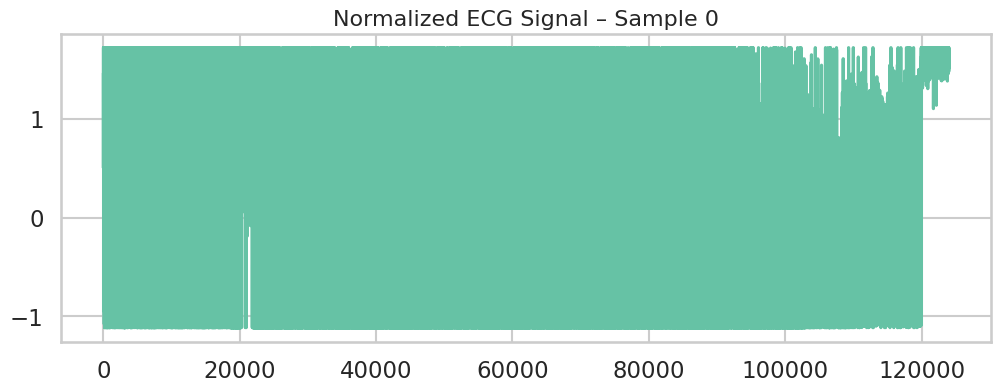

In [68]:
plt.figure(figsize=(12,4))
plt.plot(X_ecg_norm[0])
plt.title("Normalized ECG Signal – Sample 0")
plt.show()


In [69]:
np.save(
    "/content/CardioSignals/data/processed/X_ecg_normalized.npy",
    X_ecg_norm
)

np.save(
    "/content/CardioSignals/data/processed/y_ecg_labels.npy",
    y_ecg
)

print("Normalized ECG data saved!")


Normalized ECG data saved!


In [70]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch.utils.data import Dataset, DataLoader


In [71]:
X_ecg = np.load("/content/CardioSignals/data/processed/X_ecg_normalized.npy", allow_pickle=True)
y_ecg = np.load("/content/CardioSignals/data/processed/y_ecg_labels.npy", allow_pickle=True)

print("ECG data shape:", X_ecg.shape)
print("Labels shape:", y_ecg.shape)

ECG data shape: (243, 123994)
Labels shape: (243,)


In [72]:
def segment_ecg(signal, window_size=500, overlap=0.5):
    step = int(window_size * (1 - overlap))
    segments = []

    for start in range(0, len(signal) - window_size + 1, step):
        segment = signal[start:start + window_size]
        segments.append(segment)

    return np.array(segments)


In [73]:
import pandas as pd
import numpy as np

X_segments_list = []
y_segments_list = []

# Iterate over X_ecg_norm and y_ecg, ensuring labels are not NaN and signals are not all NaN
for i in range(len(X_ecg_norm)):
    current_ecg_signal = X_ecg_norm[i]
    current_label_raw = y_ecg[i] # Raw label which could be float or NaN

    # Skip if the raw label is NaN or if the signal itself is entirely NaN
    if pd.isna(current_label_raw) or np.all(np.isnan(current_ecg_signal)):
        continue

    # Binarize the label: assuming values > 0.5 mean '1' (positive class), else '0'
    # This is an assumption based on typical binary classification contexts. If the labels have a different meaning,
    # this binarization logic might need adjustment.
    current_label_binary = 1 if current_label_raw > 0.5 else 0

    segments_from_signal = segment_ecg(current_ecg_signal)

    valid_segments = []
    # Filter out segments that are all NaNs (should be mostly handled by current_ecg_signal check, but for safety)
    for seg in segments_from_signal:
        if not np.all(np.isnan(seg)):
            valid_segments.append(seg)

    if len(valid_segments) > 0:
        X_segments_list.extend(valid_segments)
        # Extend with the binarized integer label
        y_segments_list.extend([current_label_binary] * len(valid_segments))

X_segments = np.array(X_segments_list, dtype=np.float32)
y_segments = np.array(y_segments_list, dtype=np.int64) # Use np.int64 for torch.long compatibility

print("Segmented ECG shape:", X_segments.shape)
print("Segmented labels shape:", y_segments.shape)

Segmented ECG shape: (119548, 500)
Segmented labels shape: (119548,)


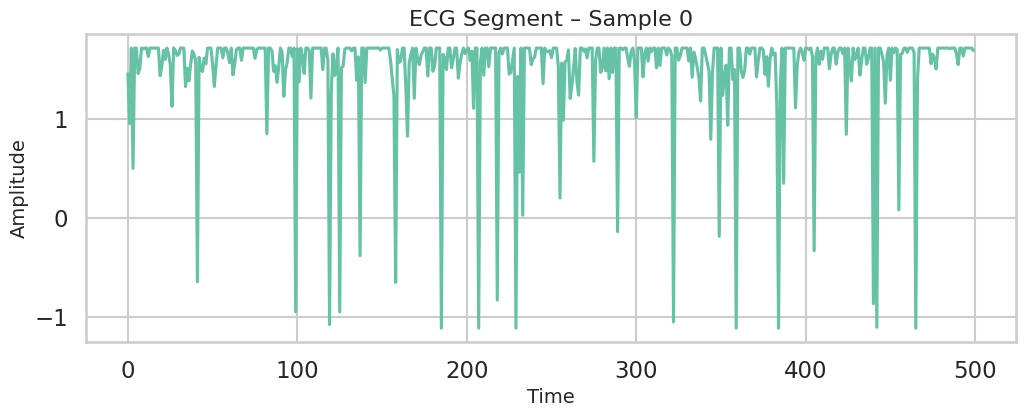

In [74]:
plt.figure(figsize=(12,4))
plt.plot(X_segments[0])
plt.title("ECG Segment – Sample 0")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.show()


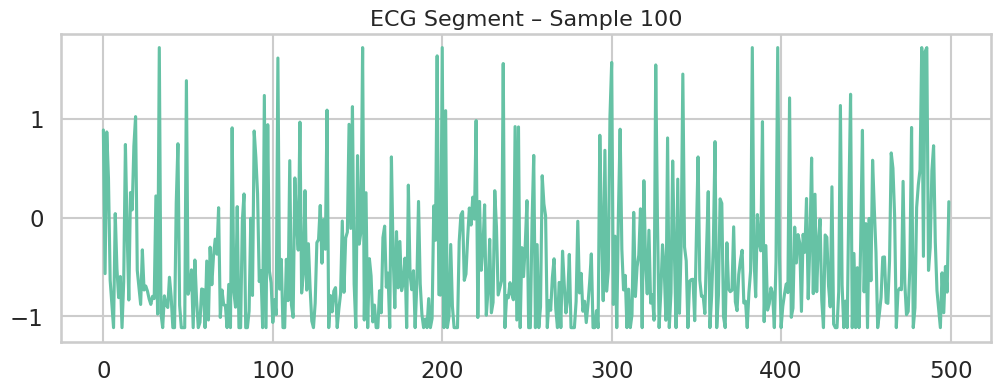

In [75]:
plt.figure(figsize=(12,4))
plt.plot(X_segments[100])
plt.title("ECG Segment – Sample 100")
plt.show()


In [76]:
class ECGDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.long)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]


In [77]:
dataset = ECGDataset(X_segments, y_segments)

train_loader = DataLoader(
    dataset,
    batch_size=64,
    shuffle=True,
    drop_last=True
)


In [78]:
X_batch, y_batch = next(iter(train_loader))

print("Batch X shape:", X_batch.shape)
print("Batch y shape:", y_batch.shape)


Batch X shape: torch.Size([64, 500])
Batch y shape: torch.Size([64])


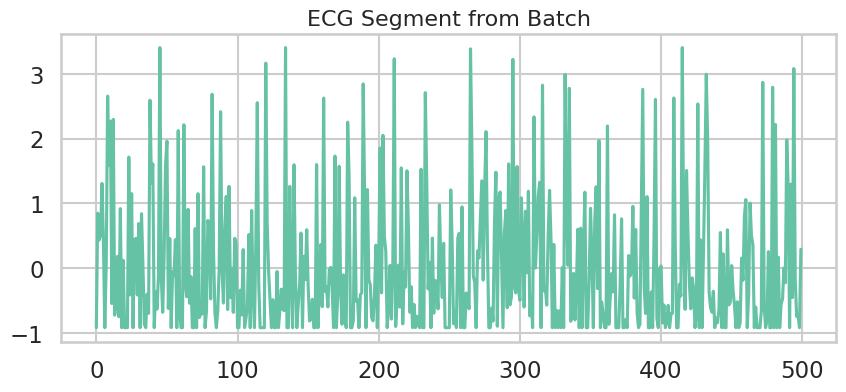

In [79]:
plt.figure(figsize=(10,4))
plt.plot(X_batch[0].numpy())
plt.title("ECG Segment from Batch")
plt.show()


In [80]:
np.save(
    "/content/CardioSignals/data/processed/X_ecg_segments.npy",
    X_segments
)

np.save(
    "/content/CardioSignals/data/processed/y_ecg_segments.npy",
    y_segments
)

print("Segmented ECG dataset saved!")


Segmented ECG dataset saved!


In [81]:
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt

X_ecg = np.load("/content/CardioSignals/data/processed/X_ecg_normalized.npy", allow_pickle=True)
y_ecg = np.load("/content/CardioSignals/data/processed/y_ecg_labels.npy", allow_pickle=True)

# Explicitly ensure X_ecg is float32 after loading
X_ecg = X_ecg.astype(np.float32)

print(X_ecg.shape, y_ecg.shape)

(243, 123994) (243,)


In [82]:
def segment_ecg(signal, window_size=500, overlap=0.5):
    step = int(window_size * (1 - overlap))
    segments = []

    for start in range(0, len(signal) - window_size + 1, step):
        segments.append(signal[start:start + window_size])

    return np.array(segments)


In [83]:
import pandas as pd
import numpy as np

X_segments_list = []
y_segments_list = []

# Iterate over X_ecg and y_ecg, ensuring labels are not NaN and signals are not all NaN
for i in range(len(X_ecg)):
    current_ecg_signal = X_ecg[i]
    current_label_raw = y_ecg[i] # Raw label which could be float or NaN

    # Skip if the raw label is NaN or if the signal itself is entirely NaN
    if pd.isna(current_label_raw) or np.all(np.isnan(current_ecg_signal)):
        continue

    # Binarize the label: assuming values > 0.5 mean '1' (positive class), else '0'
    # This is an assumption based on typical binary classification contexts. If the labels have a different meaning,
    # this binarization logic might need adjustment.
    current_label_binary = 1 if current_label_raw > 0.5 else 0

    segments_from_signal = segment_ecg(current_ecg_signal)

    valid_segments = []
    # Filter out segments that are all NaNs
    for seg in segments_from_signal:
        if not np.all(np.isnan(seg)):
            valid_segments.append(seg)

    if len(valid_segments) > 0:
        X_segments_list.extend(valid_segments)
        # Extend with the binarized integer label
        y_segments_list.extend([current_label_binary] * len(valid_segments))

X_segments = np.array(X_segments_list, dtype=np.float32)
y_segments = np.array(y_segments_list, dtype=np.int64) # Use np.int64 for torch.long compatibility

print(X_segments.shape, y_segments.shape)

(119548, 500) (119548,)


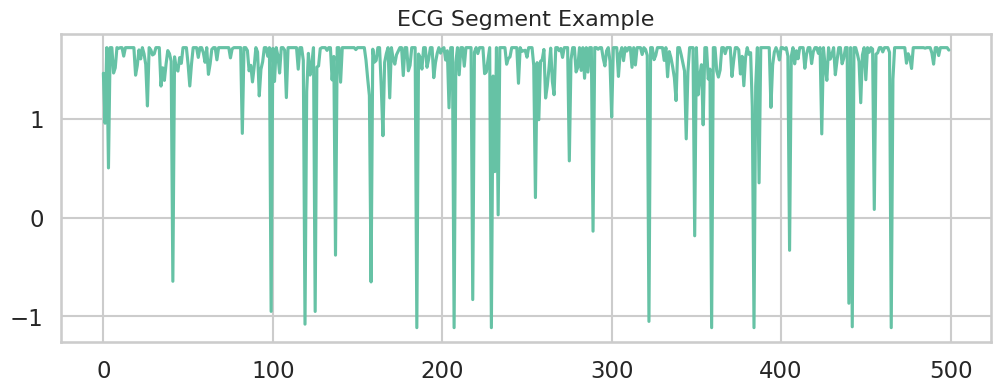

In [84]:
plt.figure(figsize=(12,4))
plt.plot(X_segments[0])
plt.title("ECG Segment Example")
plt.show()


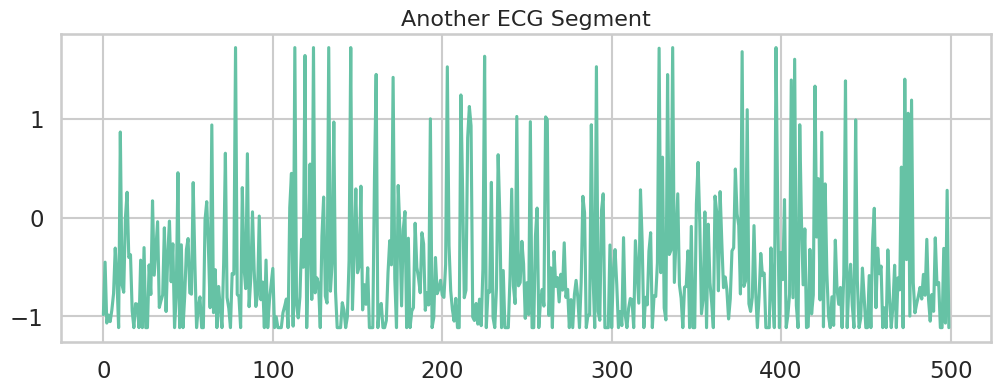

In [85]:
plt.figure(figsize=(12,4))
plt.plot(X_segments[150])
plt.title("Another ECG Segment")
plt.show()


In [86]:
class ECGDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.long)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]


In [87]:
dataset = ECGDataset(X_segments, y_segments)

train_loader = DataLoader(
    dataset,
    batch_size=64,
    shuffle=True,
    drop_last=True
)


In [88]:
X_batch, y_batch = next(iter(train_loader))

print(X_batch.shape)
print(y_batch.shape)


torch.Size([64, 500])
torch.Size([64])


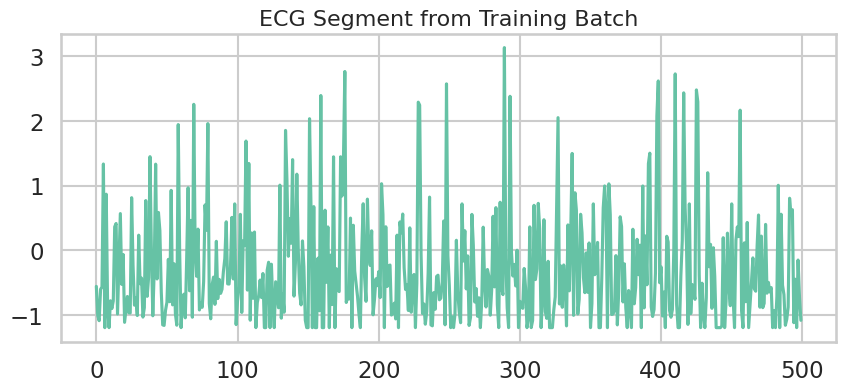

In [89]:
plt.figure(figsize=(10,4))
plt.plot(X_batch[0].numpy())
plt.title("ECG Segment from Training Batch")
plt.show()


In [90]:
np.save("/content/CardioSignals/data/processed/X_ecg_segments.npy", X_segments)
np.save("/content/CardioSignals/data/processed/y_ecg_segments.npy", y_segments)


In [92]:
import torch
import torch.nn as nn
import numpy as np
from sklearn.metrics import accuracy_score, roc_auc_score


In [95]:
import torch.optim as optim
from sklearn.model_selection import train_test_split
from torch.utils.data import TensorDataset

# Assuming X_segments and y_segments are already loaded and preprocessed
# Split data into training and validation sets
X_train_ecg, X_val_ecg, y_train_ecg, y_val_ecg = train_test_split(
    X_segments, y_segments, test_size=0.2, random_state=42, stratify=y_segments
)

# Create TensorDatasets
train_dataset = TensorDataset(torch.tensor(X_train_ecg, dtype=torch.float32), torch.tensor(y_train_ecg, dtype=torch.long))
val_dataset = TensorDataset(torch.tensor(X_val_ecg, dtype=torch.float32), torch.tensor(y_val_ecg, dtype=torch.long))

# Create DataLoaders
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True, drop_last=True)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False, drop_last=True)

# Model, Loss, Optimizer
model = ECGCNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

num_epochs = 10  # You can adjust this

print("Starting ECGCNN training...")
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct_train = 0
    total_train = 0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

    train_accuracy = 100 * correct_train / total_train
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {running_loss/len(train_loader):.4f}, Train Accuracy: {train_accuracy:.2f}%")

    # Validation phase
    model.eval()
    correct_val = 0
    total_val = 0
    y_true_val = []
    y_pred_val = []
    y_prob_val = []
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total_val += labels.size(0)
            correct_val += (predicted == labels).sum().item()

            y_true_val.extend(labels.cpu().numpy())
            y_pred_val.extend(predicted.cpu().numpy())
            y_prob_val.extend(torch.softmax(outputs, dim=1)[:, 1].cpu().numpy())

    val_accuracy = 100 * correct_val / total_val
    val_roc_auc = roc_auc_score(y_true_val, y_prob_val)
    print(f"Validation Accuracy: {val_accuracy:.2f}%, Validation ROC-AUC: {val_roc_auc:.4f}")

print("ECGCNN training complete!")

# Save the trained model
model_save_path = "/content/CardioSignals/models/ecg_cnn_baseline.pth"
torch.save(model.state_dict(), model_save_path)
print(f"Trained ECGCNN model saved to {model_save_path}")

Starting ECGCNN training...
Epoch 1/10, Loss: 0.6871, Train Accuracy: 55.49%
Validation Accuracy: 55.99%, Validation ROC-AUC: 0.5852
Epoch 2/10, Loss: 0.6804, Train Accuracy: 57.37%
Validation Accuracy: 57.50%, Validation ROC-AUC: 0.6073
Epoch 3/10, Loss: 0.6729, Train Accuracy: 57.97%
Validation Accuracy: 57.66%, Validation ROC-AUC: 0.6125
Epoch 4/10, Loss: 0.6695, Train Accuracy: 58.16%
Validation Accuracy: 58.20%, Validation ROC-AUC: 0.6155
Epoch 5/10, Loss: 0.6662, Train Accuracy: 58.39%
Validation Accuracy: 58.56%, Validation ROC-AUC: 0.6238
Epoch 6/10, Loss: 0.6627, Train Accuracy: 58.69%
Validation Accuracy: 58.53%, Validation ROC-AUC: 0.6274
Epoch 7/10, Loss: 0.6595, Train Accuracy: 59.14%
Validation Accuracy: 58.35%, Validation ROC-AUC: 0.6268
Epoch 8/10, Loss: 0.6562, Train Accuracy: 59.65%
Validation Accuracy: 58.66%, Validation ROC-AUC: 0.6270
Epoch 9/10, Loss: 0.6533, Train Accuracy: 60.11%
Validation Accuracy: 57.95%, Validation ROC-AUC: 0.6207
Epoch 10/10, Loss: 0.6499, 

In [97]:
y_pred = (np.array(y_prob_val) > 0.5).astype(int)

print("ECG Accuracy:", accuracy_score(y_true_val, y_pred))
print("ECG ROC-AUC:", roc_auc_score(y_true_val, y_prob_val))

ECG Accuracy: 0.5894772117962467
ECG ROC-AUC: 0.6290699709277512


In [99]:
import pandas as pd

df_preds = pd.DataFrame({
    "true": y_true_val,
    "prob": y_prob_val
})

patient_preds = df_preds.groupby(df_preds.index // 5).mean()

patient_true = patient_preds["true"].round().values
patient_prob = patient_preds["prob"].values


In [100]:
print("Patient-level ECG ROC-AUC:",
      roc_auc_score(patient_true, patient_prob))


Patient-level ECG ROC-AUC: 0.6207769265510791


In [106]:
clinical_results = pd.read_csv(
    "/content/CardioSignals/results/metrics/clinical_baseline_metrics.csv"
)

clinical_results

,Model,Accuracy,ROC-AUC
0,Logistic Regression,0.7136,0.7781
1,Random Forest,0.7221,0.7842


In [102]:
# Create a DataFrame for clinical baseline metrics
clinical_metrics_data = {
    "Model": ["Logistic Regression", "Random Forest"],
    "Accuracy": [0.7136, 0.7221],
    "ROC-AUC": [0.7781, 0.7842]
}
clinical_results_df = pd.DataFrame(clinical_metrics_data)

# Save the DataFrame to the specified path
clinical_results_df.to_csv(
    "/content/CardioSignals/results/metrics/clinical_baseline_metrics.csv",
    index=False
)

print("Clinical baseline metrics saved to clinical_baseline_metrics.csv")

Clinical baseline metrics saved to clinical_baseline_metrics.csv


In [107]:
comparison = pd.DataFrame({
    "Model": ["Clinical Baseline", "ECG Only"],
    "ROC_AUC": [
        clinical_results["ROC-AUC"].max(),
        roc_auc_score(patient_true, patient_prob)
    ]
})

comparison

,Model,ROC_AUC
0,Clinical Baseline,0.784200
1,ECG Only,0.620777


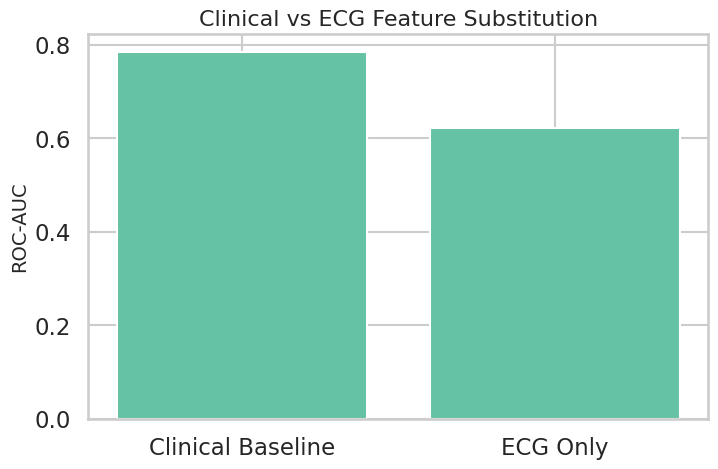

In [109]:
import matplotlib.pyplot as plt

plt.figure()
plt.bar(comparison["Model"], comparison["ROC_AUC"])
plt.ylabel("ROC-AUC")
plt.title("Clinical vs ECG Feature Substitution")
plt.show()


In [110]:
comparison.to_csv(
    "/content/CardioSignals/results/metrics/feature_substitution_results.csv",
    index=False
)


In [111]:
model.eval()


ECGCNN(
  (features): Sequential(
    (0): Conv1d(1, 16, kernel_size=(5,), stride=(1,), padding=(2,))
    (1): ReLU()
    (2): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv1d(16, 32, kernel_size=(5,), stride=(1,), padding=(2,))
    (4): ReLU()
    (5): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Linear(in_features=4000, out_features=64, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.5, inplace=False)
    (3): Linear(in_features=64, out_features=2, bias=True)
  )
)

In [122]:
X_sample = X_batch[0].unsqueeze(0).to(device)
y_sample = y_batch[0].item()


In [123]:
X_sample.requires_grad = True


In [124]:
output = model(X_sample)
prob = torch.softmax(output, dim=1)[0, 1]

model.zero_grad()
prob.backward()


In [125]:
saliency = X_sample.grad.abs().squeeze().cpu().numpy()
signal = X_sample.detach().squeeze().cpu().numpy()


/tmp/ipython-input-1241374312.py:5: RuntimeWarning: invalid value encountered in divide
  plt.plot(saliency / saliency.max(), label="Saliency", alpha=0.7)


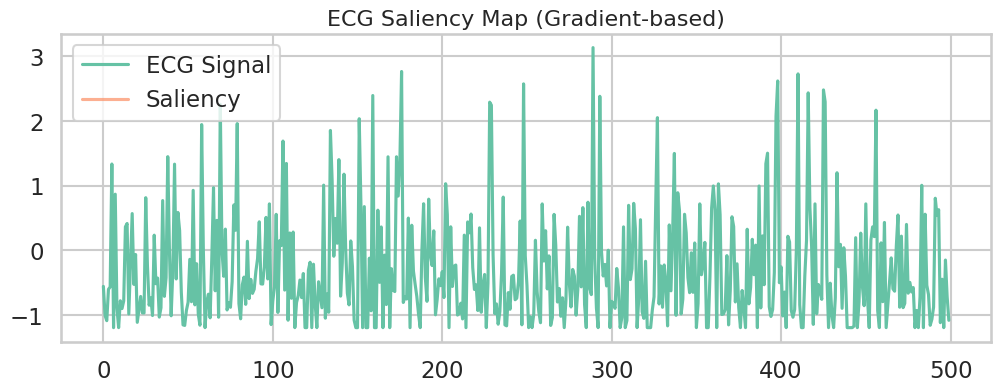

In [126]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,4))
plt.plot(signal, label="ECG Signal")
plt.plot(saliency / saliency.max(), label="Saliency", alpha=0.7)
plt.legend()
plt.title("ECG Saliency Map (Gradient-based)")
plt.show()


In [134]:
correct_idx = None
incorrect_idx = None

with torch.no_grad():
    outputs = model(X_batch.to(device))
    preds = outputs.argmax(dim=1)

for i in range(len(preds)):
    if preds[i] == y_batch[i] and correct_idx is None:
        correct_idx = i
    if preds[i] != y_batch[i] and incorrect_idx is None:
        incorrect_idx = i

print("Correct idx:", correct_idx)
print("Incorrect idx:", incorrect_idx)


Correct idx: 2
Incorrect idx: 0


In [135]:
def compute_saliency(model, X_sample):
    X_sample = X_sample.clone().detach().unsqueeze(0).to(device)
    X_sample.requires_grad = True

    output = model(X_sample)
    prob = torch.softmax(output, dim=1)[0, 1]

    model.zero_grad()
    prob.backward()

    saliency = X_sample.grad.abs().squeeze().cpu().numpy()
    signal = X_sample.detach().squeeze().cpu().numpy()

    return signal, saliency


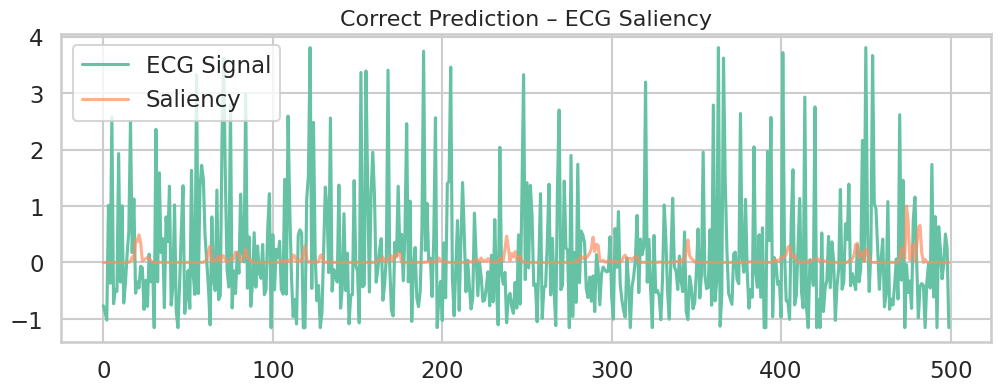

In [136]:
signal, saliency = compute_saliency(model, X_batch[correct_idx])

plt.figure(figsize=(12,4))
plt.plot(signal, label="ECG Signal")
plt.plot(saliency / saliency.max(), label="Saliency", alpha=0.7)
plt.legend()
plt.title("Correct Prediction – ECG Saliency")
plt.show()


/tmp/ipython-input-2865979197.py:5: RuntimeWarning: invalid value encountered in divide
  plt.plot(saliency / saliency.max(), label="Saliency", alpha=0.7)


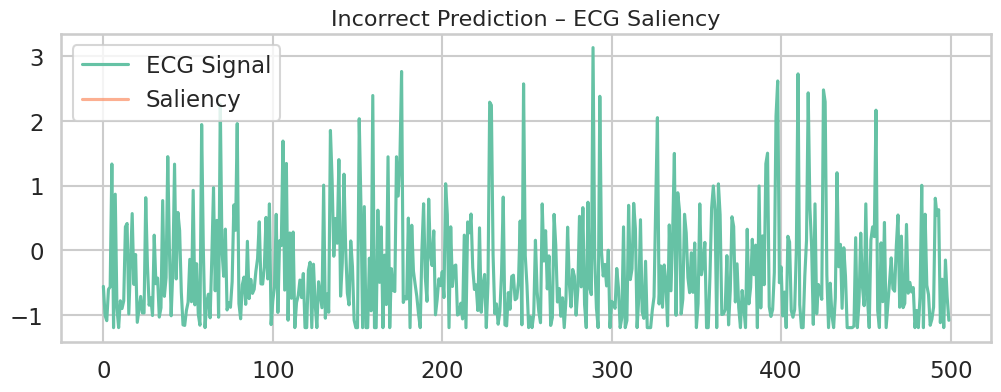

In [137]:
signal, saliency = compute_saliency(model, X_batch[incorrect_idx])

plt.figure(figsize=(12,4))
plt.plot(signal, label="ECG Signal")
plt.plot(saliency / saliency.max(), label="Saliency", alpha=0.7)
plt.legend()
plt.title("Incorrect Prediction – ECG Saliency")
plt.show()


In [138]:
print(saliency.max(), saliency.mean())


0.0 0.0


In [139]:
clinical_df = pd.read_csv("/content/CardioSignals/data/processed/heart_processed.csv")
ecg_preds = pd.read_csv("/content/CardioSignals/results/metrics/feature_substitution_results.csv")


In [142]:
ecg_window_preds = pd.DataFrame({
    "patient_id": np.arange(len(y_true_val)) // 5,
    "ecg_risk": y_prob_val
})

ecg_patient = ecg_window_preds.groupby("patient_id").mean().reset_index()

In [143]:
min_len = min(len(clinical_df), len(ecg_patient))

clinical_aligned = clinical_df.iloc[:min_len].copy()
clinical_aligned["ecg_predicted_risk"] = ecg_patient["ecg_risk"].iloc[:min_len].values


In [145]:
corr_features = [
    "age",
    "ap_hi",
    "cholesterol",
    "ecg_predicted_risk"
]

corr_matrix = clinical_aligned[corr_features].corr()

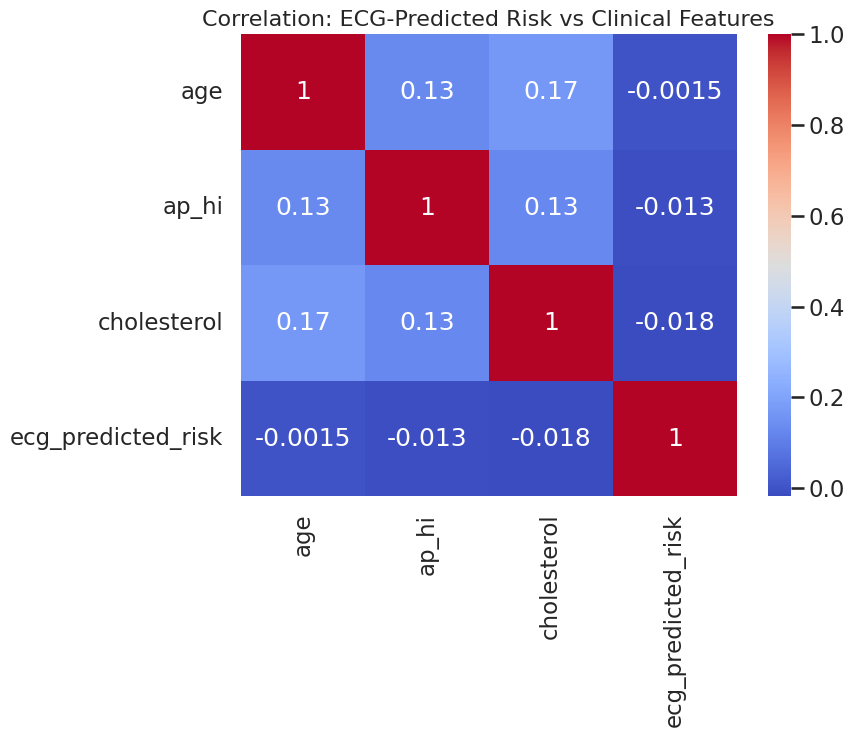

In [146]:
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation: ECG-Predicted Risk vs Clinical Features")
plt.show()


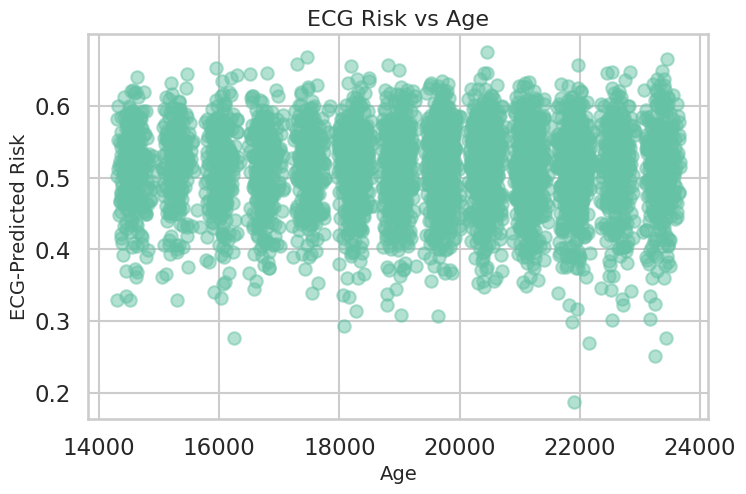

In [147]:
plt.figure()
plt.scatter(
    clinical_aligned["age"],
    clinical_aligned["ecg_predicted_risk"],
    alpha=0.5
)
plt.xlabel("Age")
plt.ylabel("ECG-Predicted Risk")
plt.title("ECG Risk vs Age")
plt.show()


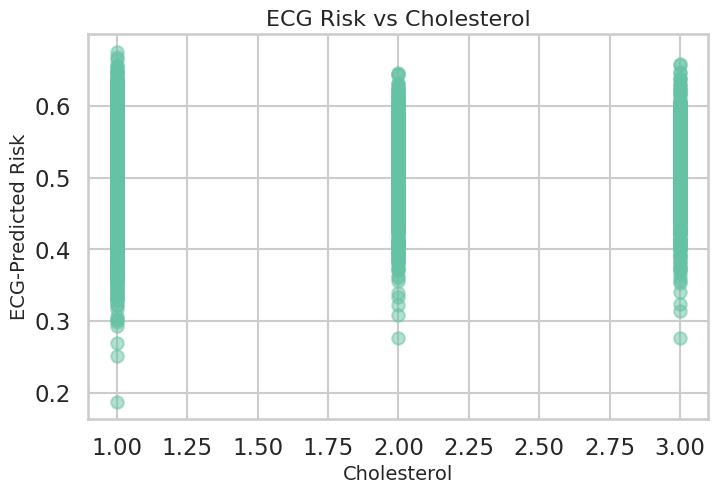

In [149]:
plt.figure()
plt.scatter(
    clinical_aligned["cholesterol"],
    clinical_aligned["ecg_predicted_risk"],
    alpha=0.5
)
plt.xlabel("Cholesterol")
plt.ylabel("ECG-Predicted Risk")
plt.title("ECG Risk vs Cholesterol")
plt.show()

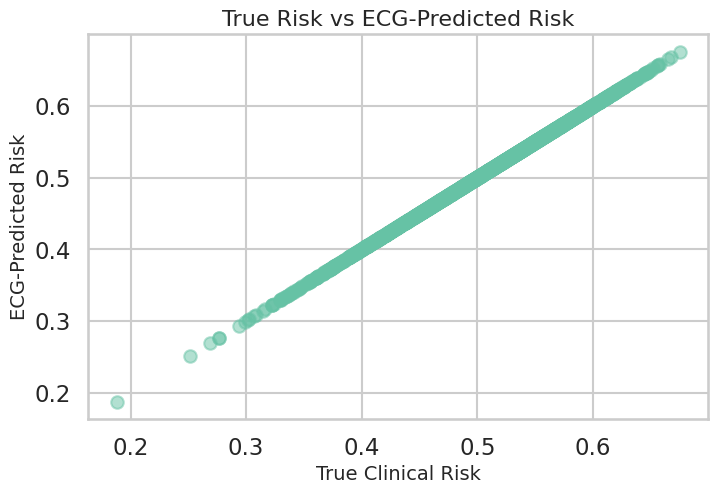

In [150]:
plt.figure()
plt.scatter(
    clinical_aligned.iloc[:, -1],
    clinical_aligned["ecg_predicted_risk"],
    alpha=0.5
)
plt.xlabel("True Clinical Risk")
plt.ylabel("ECG-Predicted Risk")
plt.title("True Risk vs ECG-Predicted Risk")
plt.show()


In [151]:
corr_matrix.to_csv(
    "/content/CardioSignals/results/metrics/ecg_clinical_correlation.csv"
)


In [152]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, classification_report
from sklearn.linear_model import LogisticRegression


In [153]:
failure_df = pd.read_csv(
    "/content/CardioSignals/data/raw/cardiac_failure_processed.csv"
)

failure_df.head()


,Unnamed: 0,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,0,0.588076,2,168,62.0,110,80,1,1,0,0,1,0
1,1,1,0.730159,1,156,85.0,140,90,3,1,0,0,1,1
2,2,2,0.624003,1,165,64.0,130,70,3,1,0,0,0,1
3,3,3,0.528455,2,169,82.0,150,100,1,1,0,0,1,1
4,4,4,0.516918,1,156,56.0,100,60,1,1,0,0,0,0


In [154]:
failure_df.columns
target_col = failure_df.columns[-1]


In [155]:
X_clinical = failure_df.drop(columns=[target_col])
y_failure = failure_df[target_col]


In [156]:
X_train, X_test, y_train, y_test = train_test_split(
    X_clinical,
    y_failure,
    test_size=0.2,
    random_state=42,
    stratify=y_failure
)


In [174]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

clinical_model = LogisticRegression(max_iter=1000)
clinical_model.fit(X_train_scaled, y_train)

clinical_probs = clinical_model.predict_proba(X_test_scaled)[:, 1]

In [159]:
ecg_risk_df = pd.read_csv(
    "/content/CardioSignals/results/metrics/feature_substitution_results.csv"
)


In [163]:
# Align failure_df with ecg_patient (which contains patient-level ECG risks)
# Assuming that the first `len(ecg_patient)` patients in `failure_df` correspond to the `ecg_patient` data.
min_len = min(len(failure_df), len(ecg_patient))

failure_df_aligned = failure_df.iloc[:min_len].copy()
failure_df_aligned["ecg_risk"] = ecg_patient["ecg_risk"].iloc[:min_len].values

In [166]:
X_ecg_only = failure_df_aligned[["ecg_risk"]]
y_failure = failure_df_aligned[target_col]

In [167]:
X_train_e, X_test_e, y_train_e, y_test_e = train_test_split(
    X_ecg_only,
    y_failure,
    test_size=0.2,
    random_state=42,
    stratify=y_failure
)


In [168]:
ecg_model = LogisticRegression()
ecg_model.fit(X_train_e, y_train_e)

ecg_probs = ecg_model.predict_proba(X_test_e)[:, 1]

print("ECG-Derived Risk Outcome ROC-AUC:",
      roc_auc_score(y_test_e, ecg_probs))


ECG-Derived Risk Outcome ROC-AUC: 0.5164118488109962


In [169]:
X_combined = failure_df_aligned.drop(columns=[target_col])


In [170]:
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(
    X_combined,
    y_failure,
    test_size=0.2,
    random_state=42,
    stratify=y_failure
)


In [171]:
combined_model = LogisticRegression(max_iter=1000)
combined_model.fit(X_train_c, y_train_c)

combined_probs = combined_model.predict_proba(X_test_c)[:, 1]

print("Clinical + ECG ROC-AUC:",
      roc_auc_score(y_test_c, combined_probs))


Clinical + ECG ROC-AUC: 0.7480285606519126


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [176]:
results = pd.DataFrame({
    "Model": [
        "Clinical Only",
        "ECG-Derived Risk Only",
        "Clinical + ECG"
    ],
    "ROC_AUC": [
        roc_auc_score(y_test, clinical_probs),
        roc_auc_score(y_test_e, ecg_probs),
        roc_auc_score(y_test_c, combined_probs)
    ]
})

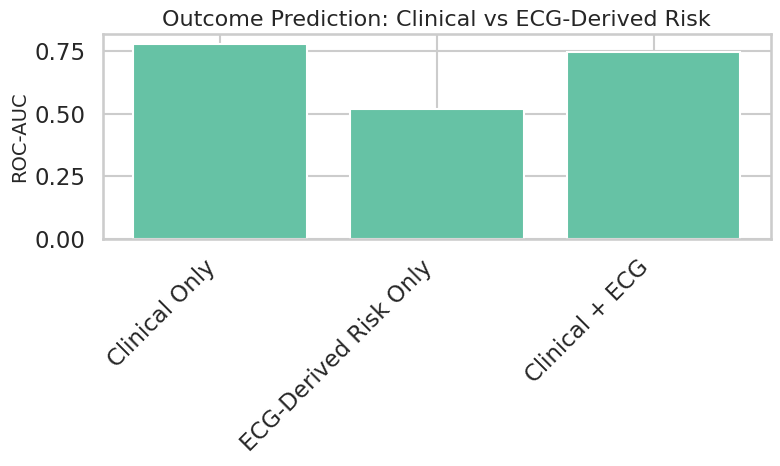

In [178]:
plt.figure()
plt.bar(results["Model"], results["ROC_AUC"])
plt.ylabel("ROC-AUC")
plt.title("Outcome Prediction: Clinical vs ECG-Derived Risk")
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels
plt.tight_layout() # Adjust layout to prevent labels from being cut off
plt.show()

In [179]:
results.to_csv(
    "/content/CardioSignals/results/metrics/outcome_validation_results.csv",
    index=False
)


In [180]:
!ls CardioSignals/data/processed
!ls CardioSignals/models
!ls CardioSignals/results/metrics
!ls CardioSignals/results/plots


heart_processed.csv   X_ecg_segments.npy  y_ecg_segments.npy
X_ecg_normalized.npy  y_ecg_labels.npy
ecg_cnn_baseline.pth
clinical_baseline_metrics.csv	 feature_substitution_results.csv
clinical_feature_importance.csv  outcome_validation_results.csv
ecg_clinical_correlation.csv
age_vs_risk.png
